In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
numThreads = [32, 64, 128, 256]
numSkiers = 20000
n = len(numThreads)

In [8]:
def make_csv_path(numThreads, numSkiers):
    csv_name = "threads{}_skiers{}.csv".format(numThreads, numSkiers)
    csv_path = "../output_csv/{}".format(csv_name)
    return csv_path

In [9]:
make_csv_path(numThreads[0], numSkiers)

'../output_csv/threads32_skiers20000.csv'

In [10]:
csv_paths = []
for numThread in numThreads:
    csv_paths.append(make_csv_path(numThread, numSkiers))
csv_paths

['../output_csv/threads32_skiers20000.csv',
 '../output_csv/threads64_skiers20000.csv',
 '../output_csv/threads128_skiers20000.csv',
 '../output_csv/threads256_skiers20000.csv']

In [11]:
def make_latency_df(numThreads, numSkiers):
    csv_path = make_csv_path(numThreads, numSkiers)
    csv = pd.read_csv(csv_path, skipinitialspace=True)
    df = pd.DataFrame(csv)
    start = df["startTime"][0]
    df = df[["startTime", "latency"]]
    
    # update seconds started to startTime column
    for i in range(0, len(df)):
        df.at[i, "startTime"] = (df.at[i, "startTime"] - start) / 1000
    gb = df.groupby('startTime')['latency'].mean()
    latency_df = pd.DataFrame(gb)
    return latency_df

In [16]:
def plot_df(numThreads, numSkiers, latency_df):
    fig, ax = plt.subplots()
    plt.plot(latency_df["latency"], color = 'grey')
    plt.title("POST request latency. numThreads = {}. numSkiers = {}".format(numThreads, numSkiers), fontweight='bold')
    plt.xlabel('Seconds since program starts') 
    plt.ylabel('Latency (milliseconds)') 
    plt.axhline(y=latency_df["latency"].mean(), color='r', linewidth=1, linestyle='-', label = "mean")
    plt.axhline(y=latency_df["latency"].median(), color='b', linewidth=1, linestyle='-', label = "median")
    plt.axhline(y=latency_df["latency"].quantile(0.99), color='g', linewidth=1, linestyle='-', label = "99th percentile")
    ax.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

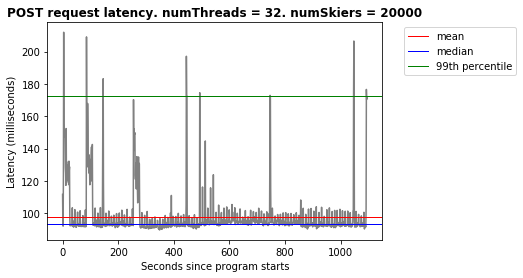

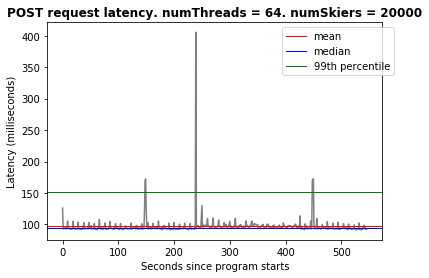

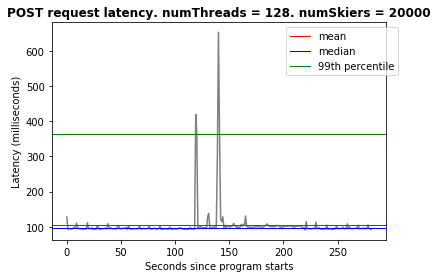

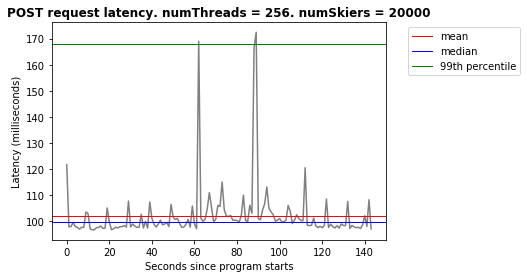

In [17]:
for nthread in numThreads:
    latency_df = make_latency_df(nthread, numSkiers)
    plot_df(nthread, numSkiers, latency_df)
